In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from typing import Tuple

In [8]:
def build_lenet(input_shape: tuple =(32, 32, 1), num_classes:int = 10) -> tf.keras.Model:
    """Build a LeNet model with the given input shape and number of classes.
    
    Args:
        input_shape: tuple, the shape of the input data (default = (32, 32, 1))
        num_classes: int, the number of classes in the dataset (default = 10)
    
    Returns:
        Compiled LeNet model
    """
    model = Sequential([
        # Convolution Layer 1
        Conv2D(filters = 6, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', input_shape = input_shape),
        Activation('tanh'),
        AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'),

        # Convolution Layer 2
        Conv2D(filters = 16, kernel_size = (5, 5), strides = (1, 1), padding = 'valid'),
        Activation('tanh'),
        AveragePooling2D(pool_size = (2, 2), strides=(2, 2), padding = 'valid'),

        # Flatten Layer
        Flatten(),

        # Fully Connected Layer 1
        Dense(units = 120, activation = 'tanh'),

        # Fully Connected Layer 2
        Dense(units = 84, activation = 'tanh'),

        # Output Layer
        Dense(units = num_classes, activation = 'softmax')
    ])
    
    model.summary()

    return model


In [9]:
def preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    # Convert to float32
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # Normalize the data
    x_train /= 255
    x_test /= 255
    
    return (x_train, y_train), (x_test, y_test)

In [10]:
# Train the model
def train_and_evaluate(model: tf.keras.Model, x_train: tf.Tensor, y_train: tf.Tensor, x_test: tf.Tensor, y_test: tf.Tensor) -> tf.keras.callbacks.History:
    history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))
    return history

In [11]:
# Visualize the training history
def plot_training_results(history: tf.keras.callbacks.History):
    plt.figure(figsize = (12, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()

c:\Users\nguye\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 24, 24, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8238 - loss: 0.6407 - val_accuracy: 0.9542 - val_loss: 0.1546
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9598 - loss: 0.1373 - val_accuracy: 0.9743 - val_loss: 0.0829
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0801 - val_accuracy: 0.9796 - val_loss: 0.0653
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9827 - val_loss: 0.0558
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9865 - loss: 0.0437 - val_accuracy: 0.9847 - val_loss: 0.0497
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9878 - loss: 0.0407 - val_accuracy: 0.9846 - val_loss: 0.0451
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0319 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.

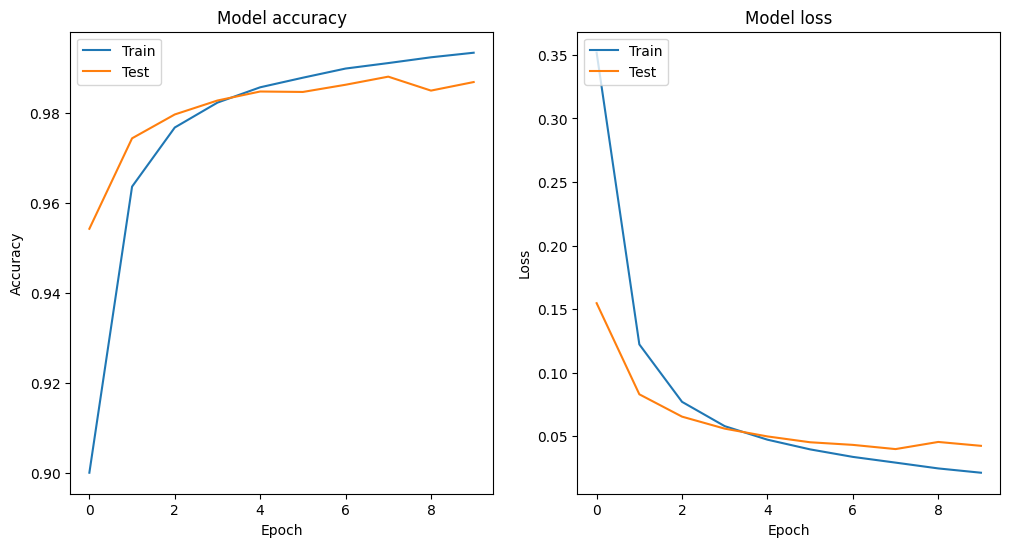

In [12]:
(x_train, y_train), (x_test, y_test) = preprocess_data()
model = build_lenet(input_shape=(28, 28, 1), num_classes=10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = train_and_evaluate(model, x_train, y_train, x_test, y_test)
plot_training_results(history)